### Install Required Packages

We would be running Facebook's `CutLER` so enable `GPU` under `View Resources > Change runtime type` for faster inference.

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ed2bb382-7b4f-05c6-41c6-ff99c8c10148)


#### CutLER

Getting hold of the `CutLER` repo.

In [2]:
!git clone --recursive https://github.com/facebookresearch/CutLER

Cloning into 'CutLER'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 232 (delta 87), reused 191 (delta 72), pack-reused 9
Receiving objects: 100% (232/232), 21.38 MiB | 35.95 MiB/s, done.
Resolving deltas: 100% (87/87), done.
Submodule 'third_party/TokenCut' (https://github.com/YangtaoWANG95/TokenCut.git) registered for path 'third_party/TokenCut'
Cloning into '/content/CutLER/third_party/TokenCut'...
remote: Enumerating objects: 212, done.        
remote: Counting objects: 100% (62/62), done.        
remote: Compressing objects: 100% (38/38), done.        
remote: Total 212 (delta 42), reused 32 (delta 23), pack-reused 150        
Receiving objects: 100% (212/212), 7.29 MiB | 13.05 MiB/s, done.
Resolving deltas: 100% (81/81), done.
Submodule path 'third_party/TokenCut': checked out '5eba77f56f0fc92ffc79589d0cbb119aab5f9b2d'


In [3]:
%cd CutLER/

/content/CutLER


We install `Detectron2` as `CutLER` requires it for running the models.

In [4]:
# Install Detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# COCO Panoptic Segmentation Task API
!pip install git+https://github.com/cocodataset/panopticapi.git

# CityScapes Dataset
!pip install git+https://github.com/mcordts/cityscapesScripts.git

# CutLER requirements
!pip install -r requirements.txt

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-kdfepwla
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-kdfepwla
  Resolved https://github.com/facebookresearch/detectron2.git to commit 67ac149947124670f6678e1bdd75f89dbf0dd5e7
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=7803648 sha256=8e633fefa2131b87faf01c19993f3489

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61264 sha256=0fe085c41ffe0f49fd41dd77c39cf79a5c52b24709f646526a15956582d83f90
  Stored in directory: /root/.cache/pip/wheels/c7/8f/c9/1da09aeb3f6ffbc1835fea895c84268a23124e085759da5031
Successfully built fvcore
  Attempting uninsta

In [5]:
%cd cutler/demo

/content/CutLER/cutler/demo


### Load Necessary Libraries

We will load the necessary libraries, which would be required to run Inference with CutLER and Configure it.

In [6]:
# general
import random
from tqdm import tqdm
import gc
import json
import datetime
import argparse
import os
import tempfile
import time
import zipfile
import shutil
import sys
sys.path.append('./')
sys.path.append('../')

# multiprocessing
import multiprocessing as mp

# matrix manipulation
import numpy as np

# plotting
import matplotlib.pyplot as plt

# image processing
from PIL import Image
import cv2
import imagesize

# detectron2 utils
from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.utils.logger import setup_logger
from modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer

# data handling
from pycocotools.coco import COCO
from torch.utils.data import DataLoader, Dataset

# evaluation
from evaluation import COCOEvaluator
from train_net import Trainer

# model building
import torch

# cutler utils
from config import add_cutler_config
from predictor import VisualizationDemo

#### CutLER

Configure `CutLER` below and download its pretrained weights.

In [7]:
# load config from file and command-line arguments
cfg = get_cfg()

# Add CutLER config to our config
add_cutler_config(cfg)

# Add config values from file
cfg.merge_from_file('../model_zoo/configs/CutLER-ImageNet/cascade_mask_rcnn_R_50_FPN.yaml')

# Add Link to weights for CutLER Model
cfg.MODEL.WEIGHTS = 'http://dl.fbaipublicfiles.com/cutler/checkpoints/cutler_cascade_final.pth'

# Set device on which to run the model
# Note: Using ***CPU*** by default. to run on GPU, remove "cfg.MODEL.DEVICE", "cpu".
cfg.MODEL.DEVICE = 'cuda'

# Disable the use of SyncBN normalization when running on a CPU
# SyncBN is not supported on CPU and can cause errors, so we switch to BN instead
if cfg.MODEL.DEVICE == 'cpu' and cfg.MODEL.RESNETS.NORM == 'SyncBN':
    cfg.MODEL.RESNETS.NORM = "BN"
    cfg.MODEL.FPN.NORM = "BN"

# Set score_threshold for builtin models
# Note: you can use a lower value than .5 to get a higher recall.
# cfg.MODEL.RETINANET.SCORE_THRESH_TEST = .5
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = .5
# cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = .5

# Evaluation later will be done on class agnostic coco dataset
cfg.DATASETS.TEST = (('cls_agnostic_coco'),)

# freeze
cfg.freeze()

In [8]:
# use spawn for multiprocessing start process
mp.set_start_method("spawn", force=True)

# input image
# input_image = 'imgs/demo1.jpg'

In [9]:
# logger for logging detection related info
setup_logger(name="fvcore")
logger = setup_logger()

# visualizing detections
# demo = VisualizationDemo(cfg)

### Load Data

Here I download the data. If you already have it skip to entering the `IMAGE DIRECTORY PATH`.

In [10]:
import zipfile
!wget -nc http://images.cocodataset.org/zips/val2017.zip

--2023-07-05 13:53:25--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.7.141, 52.216.21.235, 3.5.20.225, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.7.141|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  66.4MB/s    in 11s     

2023-07-05 13:53:36 (71.9 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [11]:
os.mkdir('datasets')
os.mkdir('datasets/coco')

In [12]:
zf = zipfile.ZipFile('val2017.zip')
zf.extractall('datasets/coco')

Enter the Directory Path (`IMAGE_DIRECTORY_PATH`) which contains all the images which needs to be annotated by `CutLER`.

In [13]:
IMAGE_DIRECTORY_PATH = 'datasets/coco/val2017' # Enter Directory containing all the images
NAME_OF_DATASET = 'coco_2017_val'

Enter the `info` about the `licenses` of the image dataset you are using below

In [14]:
info = { # Info about the dataset
    "description": NAME_OF_DATASET,
    "url": "lala",
    "version": "1.0",
    "year": 2023,
    "contributor": "Rishi Dey Chowdhury (RishiDarkDevil)",
    "date_created": "2023"
}

licenses = [{ # Licenses associated with the dataset
    'url': 'lala',
    'id': 1,
    'name': 'MIT License'
}]

We prepare the `ImageDataset` consisting of the list of paths to the image files. We will load them when required i.e. when we want to `__getitem__`.

In [15]:
class ImageDataset(Dataset):
  """
  Image Dataset, it loads the images from the paths when an item is fetched
  """
  def __init__(self, imagery):
    self.imagery = imagery

  def __getitem__(self, index):
    return cv2.imread(self.imagery[index])

  def __len__(self):
    return len(self.imagery)

We need to pass a list consisting of the image paths to the `ImageDataset` and then we are ready to use our nifty little `ImageDataset`.

In [16]:
# Image paths
image_names = os.listdir(IMAGE_DIRECTORY_PATH)
image_paths = [os.path.join(IMAGE_DIRECTORY_PATH, name) for name in image_names]

# Dataset
data = ImageDataset(image_paths)

In [17]:
images = list() # Contains the image details
for image_id, image_name in enumerate(image_names):

  # Calculating image size
  width, height = imagesize.get(image_paths[image_id])

  images.append({ # Contains the image details
      'license': 1,
      'file_name': image_name,
      'height': height,
      'width': width,
      'date_captured': datetime.datetime.now().strftime("%m/%d/%Y, %H:%M:%S"),
      'id': image_id + 1
    })

Let's view some example image from our dataset.

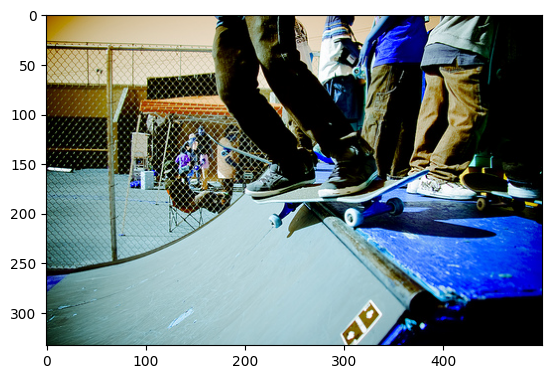

In [18]:
plt.imshow(data[0])

In [19]:
len(data)

5000

### Inference CutLER

In [128]:
# import shutil
# shutil.rmtree('CutLER-Annotation')

Set some parameters.

In [129]:
BATCH_SIZE = 2 # Batch Size i.e. the number of images to be processed at once
NUM_WORKERS = 0 # Number of worker for the DataLoader
SAVE_AFTER = 1 # After how many batches to save the results

We will store all the annotations in the following `CutLER-Annotation` folder.

In [130]:
# The folder that will contain the predicted output
os.mkdir('CutLER-Annotation')

annotations = list() # Contains all the predicted annotations
save_idx = 0 # Contains save index

In [131]:
# class agnostic setting so no class info we just detect objects
categories = list()
for id, obj in enumerate(['object']):
  categories.append({
      'supercategory': '',
      'id': id + 1,
      'name': obj
  })

In [132]:
class NpEncoder(json.JSONEncoder): # To help encode the unsupported datatypes to json serializable format
  def default(self, obj):
    if isinstance(obj, np.integer):
        return int(obj)
    if isinstance(obj, np.floating):
        return float(obj)
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    return json.JSONEncoder.default(self, obj)

def save(): # Saving annotations and captions when called -- mainly to avoid code repetition

  # To prevent creating new scope
  global save_idx

  # Serializing json
  json_obj_det = json.dumps({
      'info': info,
      'licenses': licenses,
      'images': images,
      'annotations': annotations,
      'categories': categories
  }, indent=4, cls=NpEncoder)

  # Writing json
  with open(f"CutLER-Annotation/object_detect-{save_idx}.json", "w") as outfile:
    outfile.write(json_obj_det)

  save_idx += 1

  # Clearing up the annotation list to accomodate for more annotation as it comes
  annotations.clear()

  print('Saved Annotations')

The following function helps free up the unused GPU RAM from time to time, during inference. Greatly helps in reducing `OOMError`.

In [133]:
# Frees up GPU to help reduce memory leak
def optimize_gpu():
  # Reset Already occupied Memory and Cache
  torch.cuda.reset_max_memory_allocated()
  torch.cuda.reset_max_memory_cached()
  torch.cuda.empty_cache()

  # Garbage Collection
  gc.collect()

`CutLER` generates masks for instance segmentation instead of polygons. So the following function helps to convert mask to polygon. As we decided to store in that format the segmentation in the COCO Annotation File.

In [134]:
def mask_to_polygons(mask):
  # cv2.RETR_CCOMP flag retrieves all the contours and arranges them to a 2-level
  # hierarchy. External contours (boundary) of the object are placed in hierarchy-1.
  # Internal contours (holes) are placed in hierarchy-2.
  # cv2.CHAIN_APPROX_NONE flag gets vertices of polygons from contours.
  mask = np.ascontiguousarray(mask)  # some versions of cv2 does not support incontiguous arr
  res = cv2.findContours(mask.astype("uint8"), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  hierarchy = res[-1]
  if hierarchy is None:  # empty mask
      return [], False
  # has_holes = (hierarchy.reshape(-1, 4)[:, 3] >= 0).sum() > 0
  res = res[-2]
  # Total area for all the polygon's area added up
  tot_area = np.sum([cv2.contourArea(cnt) for cnt in res])
  res = [x.flatten() for x in res]
  # These coordinates from OpenCV are integers in range [0, W-1 or H-1].
  # We add 0.5 to turn them into real-value coordinate space. A better solution
  # would be to first +0.5 and then dilate the returned polygon by 0.5.
  res = [x + 0.5 for x in res if len(x) >= 6]
  return res, tot_area

The following can be treated as a general class to allow batch inference on images using any `Detectron2` model (in our case `CutLER`).

In [135]:
class BatchPredictor:
  """
  Batch Prediction from Detectron2's model, in our case CutLER
  """

  def __init__(self, cfg, batch_size, workers):

    print('*** SETTING UP THE MODEL ***')

    self.cfg = cfg.clone()  # cfg can be modified by model
    # self.classes = classes # object classes
    self.batch_size = batch_size # batch size
    self.workers = workers # number of workers
    self.model = build_model(self.cfg) # builds the model
    self.model.eval()
    self.image_id = 1 # Image ID
    self.annotation_id = 1 # Annotation ID

    checkpointer = DetectionCheckpointer(self.model)
    checkpointer.load(cfg.MODEL.WEIGHTS)

    print('*** DONE ***')

  def __collate(self, batch):
    """
    Creates the input which the model expects and
    Converts into PyTorch acceptable format
    """
    data = []
    for image in batch:
      height, width = image.shape[:2]
      image = image.astype("float32").transpose(2, 0, 1)
      image = torch.as_tensor(image)
      data.append({"image": image, "height": height, "width": width})
    return data

  def __call__(self, imagery):
    """[summary]
    The acutal inference code which handles calling the model
    """

    # Creating the Image Dataset
    dataset = ImageDataset(imagery)

    # Setting up the DataLoader
    loader = DataLoader(
      dataset,
      self.batch_size,
      shuffle=False,
      num_workers=self.workers,
      collate_fn=self.__collate,
      pin_memory=True
    )

    print('*** INFERENCE ***')
    print('Number of Images to be processed:', len(dataset))
    print()

    k = 0 # Batch Index

    with torch.no_grad():

      for batch in tqdm(loader):

        k += 1 # Update batch index

        optimize_gpu()

        # Run the model on the batch
        results = self.model(batch)

        # Add the results
        for result in results:
          for ann in self.__map_predictions(result['instances']):
            annotations.append(ann)

        # Save prediction results
        if k % SAVE_AFTER == 0:
          save()

        # Delete unused variables
        del results

        optimize_gpu()

    # Save prediction results
    if k % SAVE_AFTER != 0:
      save()

    print()
    print('*** DONE ***')


  def __map_predictions(self, instances):
    """
    Converts the predictions into COCO format
    """
    instance_predictions = zip(
      instances.get('pred_boxes'),
      instances.get('pred_masks').cpu().numpy(),
      instances.get('scores').cpu().numpy(),
      instances.get('pred_classes').cpu().numpy()
    )

    predictions = []

    # Converting the Prediction into COCO format
    for box, mask, score, class_index in instance_predictions: # !!!!!!!!! HANDLE MASK
      # The COCO format requirement
      x1 = box[0].item()
      y1 = box[1].item()
      x2 = box[2].item()
      y2 = box[3].item()
      width = x2 - x1
      height = y2 - y1

      segments, area = mask_to_polygons(mask)

      ann_det = { # Annotation details
        'segmentation': segments,
        'area': area,
        'iscrowd': 0,
        'image_id': self.image_id,
        'bbox': [x1, y1, width, height],
        'category_id': class_index+1,
        'id': self.annotation_id,
      }

      self.annotation_id += 1

      predictions.append(ann_det)

    self.image_id += 1
    # Delete unused variables
    del instance_predictions

    return predictions

Setting up the predictor for running.

In [136]:
predictor = BatchPredictor(cfg=cfg, batch_size=BATCH_SIZE, workers=NUM_WORKERS)

*** SETTING UP THE MODEL ***
[07/04 23:55:58 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from http://dl.fbaipublicfiles.com/cutler/checkpoints/cutler_cascade_final.pth ...
[07/04 23:55:58 fvcore.common.checkpoint]: [Checkpointer] Loading from /root/.torch/iopath_cache/cutler/checkpoints/cutler_cascade_final.pth ...
*** DONE ***


Below we run the model and generate predictions.

In [137]:
image_paths[:2]

['val2017/000000446522.jpg', 'val2017/000000051610.jpg']

In [138]:
predictor(image_paths[:2])

*** INFERENCE ***
Number of Images to be processed: 2



100%|██████████| 1/1 [00:12<00:00, 12.48s/it]

Saved Annotations

*** DONE ***


In [ ]:
# Free Up Any Occupied Memory
optimize_gpu()

In [ ]:
# # Uncomment to remove the CutLER-Annotation Folder along with it's contents
# import shutil
# shutil.rmtree('CutLER-Annotation')

Now, I will be generating multiple annotation files. So, I merge them into single annotation file.

In [139]:
print('Starting Annotation Files Merge...')
# Annotation File Names present in the annotations directory
ann_file_names = os.listdir('CutLER-Annotation')
print('Number of Annotation Files found:', len(ann_file_names))
print('Annotation Files found:', ' '.join(ann_file_names))
ann_files = list() # Contains the list of loaded annotation json files
for ann_file_name in tqdm(ann_file_names): # Loads the annotation json files and appens to ann_files
  with open(os.path.join('CutLER-Annotation', ann_file_name)) as json_file:
    ann_file = json.load(json_file)
    ann_files.append(ann_file)
# Creating the single annotation file
annotation_file = {
    'info': ann_files[0]['info'],
    'licenses': ann_files[0]['licenses'],
    'images': [image for ann_file in ann_files for image in ann_file['images']],
    'annotations': [ann for ann_file in ann_files for ann in ann_file['annotations']],
    'categories': [cat for ann_file in ann_files for cat in ann_file['categories']]
}
# Serializing json
ann_json_file = json.dumps(annotation_file, indent=4)
# Writing json
with open(f"CutLER-Annotation/annotations.json", "w") as outfile:
  outfile.write(ann_json_file)
print()
print('Saved Annotation file... annotations.json')
# UNCOMMENT IF YOU WISH TO REMOVE ALL THE ANNOTATION FILES EXCEPT ONE BIG ANNOTATION FILE
# print('Removing the annotation files other than annotations.json')
# for ann_file_name in ann_file_names:
#   os.remove(os.path.join('Data-Generated/annotations', ann_file_name))
print('A successful merge!')

Starting Annotation Files Merge...
Number of Annotation Files found: 1
Annotation Files found: object_detect-0.json


100%|██████████| 1/1 [00:00<00:00, 28.80it/s]


Saved Annotation file... annotations.json
A successful merge!


### Visualizing Predictions

Set the `annotation_path` below.

In [140]:
annotation_path = r'CutLER-Annotation/annotations.json' # Annotation File Path

In [141]:
coco_annotation = COCO(annotation_file=annotation_path) # Creating COCO wrapper for our annotation

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Below we visualize our `CutLER` annotated dataset. We now can exploit the benefit of using COCO dataset format, i.e. COCO utility functions for visualizing the results.

In [142]:
def visualize_annotation(image_id, figsize = (20,10)):
  # Load Image Details corresponding to the image_id
  img_info = coco_annotation.loadImgs([image_id])[0]
  img_file_name = img_info['file_name']
  # Load Annotation Details corresponding to the image_id
  ann_ids = coco_annotation.getAnnIds(imgIds=[image_id], iscrowd=None)
  anns = coco_annotation.loadAnns(ann_ids)
  # Load Image corresponding to the image_id
  im = Image.open(os.path.join(IMAGE_DIRECTORY_PATH, img_file_name))
  # Plot and visualize results
  fig, ax = plt.subplots(1, 2, figsize=figsize)
  ax[0].axis('off')
  ax[1].axis('off')
  ax[0].imshow(np.asarray(im))
  ax[1].imshow(np.asarray(im))
  coco_annotation.showAnns(anns, draw_bbox=True)
  ann_names = [coco_annotation.loadCats(ann['category_id'])[0]['name'] for ann in anns]
  for i, ann in enumerate(anns):
    ax[1].text(anns[i]['bbox'][0], anns[i]['bbox'][1], ann_names[i], style='italic',
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5})
  plt.show()

Let's visualize random `NUM_IMAGES_VISUALISATIONS` images and their annotations.

In [143]:
NUM_IMAGES_VISUALISATIONS = 2 # Number of images to visualize

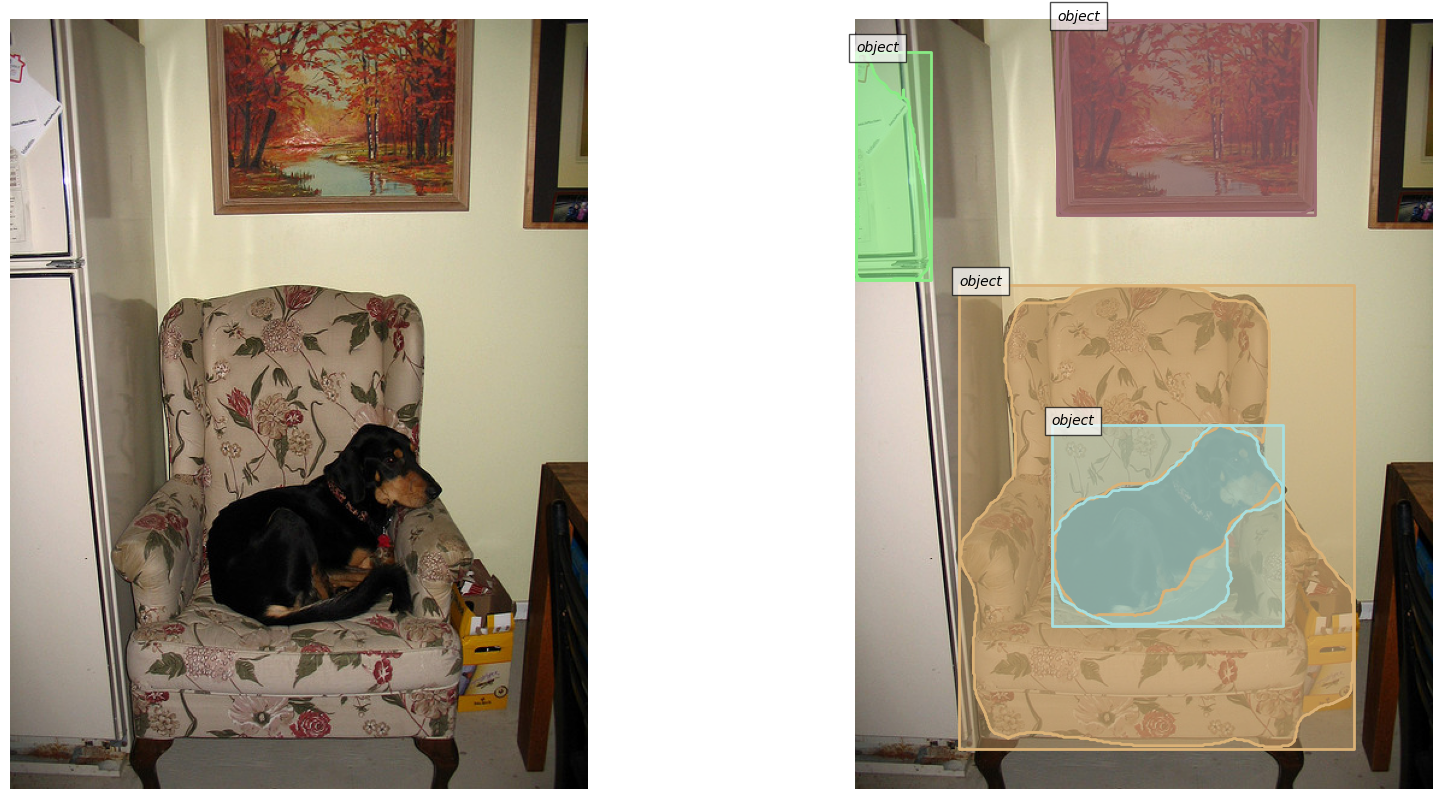

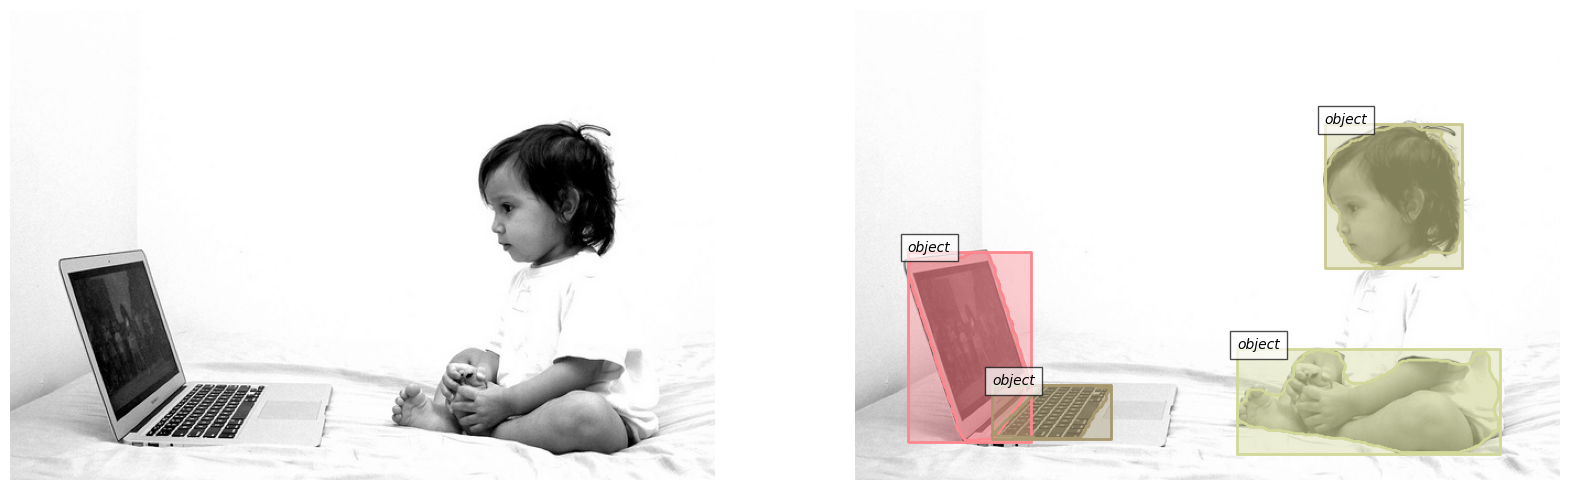

In [144]:
random_image_ids = random.sample(list(range(1, 3)), NUM_IMAGES_VISUALISATIONS)
for i in random_image_ids:
  try:
    visualize_annotation(i)
  except Exception as e:
    print(f'Skipping {i}th visualization...')

### Evaluation

#### Load Evaluation Annotation Dataset

Run the code upto `Inference CutLER` then run from below for evaluation.

Load Evaluation Annotations.

In [20]:
# COCO original validation dataset
!wget -nc http://images.cocodataset.org/annotations/annotations_trainval2017.zip

# COCO semi-supervised validation dataset
!wget -nc http://dl.fbaipublicfiles.com/cutler/coco-smi/annotations.zip

# COCO class agnostic dataset
!wget -nc http://dl.fbaipublicfiles.com/cutler/coco/coco_cls_agnostic_instances_val2017.json

--2023-07-05 13:53:43--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.36.204, 54.231.132.249, 3.5.28.211, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.36.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  91.3MB/s    in 2.6s    

2023-07-05 13:53:46 (91.3 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

--2023-07-05 13:53:46--  http://dl.fbaipublicfiles.com/cutler/coco-smi/annotations.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.84.160.80, 99.84.160.108, 99.84.160.46, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.84.160.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472407791 (451M) [application/zip]
Saving to: ‘anno

In [21]:
# place the coco original validation dataset in it's correct place
zf = zipfile.ZipFile('annotations_trainval2017.zip')
zf.extractall('datasets/coco')

# place the coco semi-supervised validation dataset in it's correct place
zf = zipfile.ZipFile('annotations.zip')
zf.extractall('datasets/coco')

# place the class agnostic COCO dataset in correct place
if not os.path.exists('datasets/coco/annotations'):
  os.mkdir('datasets/coco/annotations')

shutil.move('coco_cls_agnostic_instances_val2017.json', 'datasets/coco/annotations/coco_cls_agnostic_instances_val2017.json')

'datasets/coco/annotations/coco_cls_agnostic_instances_val2017.json'

Create Evaluator for COCO dataset

In [32]:
# set the evaluation dataset
evaluators = [COCOEvaluator('cls_agnostic_coco', no_segm=True)]

In [22]:
# set the evaluation dataset
evaluators = [COCOEvaluator('cls_agnostic_coco', no_segm=False)]

In [ ]:
# the model to be evaluated
model = Trainer.build_model(cfg)

# checkpointing the model
DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
    cfg.MODEL.WEIGHTS, resume=False
)

Evaluating model

In [24]:
# evaluate the model on the evaluation dataset
res = Trainer.test(cfg=cfg, model=model, evaluators=evaluators)

[07/05 13:54:33 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[07/05 13:54:33 d2.data.common]: Serializing 5000 elements to byte tensors and concatenating them all ...
[07/05 13:54:33 d2.data.common]: Serialized dataset takes 19.10 MiB
[07/05 13:54:33 d2.evaluation.evaluator]: Start inference on 5000 batches


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/05 13:54:38 d2.evaluation.evaluator]: Inference done 11/5000. Dataloading: 0.0200 s/iter. Inference: 0.1498 s/iter. Eval: 0.0656 s/iter. Total: 0.2353 s/iter. ETA=0:19:34
[07/05 13:54:43 d2.evaluation.evaluator]: Inference done 32/5000. Dataloading: 0.0239 s/iter. Inference: 0.1492 s/iter. Eval: 0.0644 s/iter. Total: 0.2376 s/iter. ETA=0:19:40
[07/05 13:54:48 d2.evaluation.evaluator]: Inference done 53/5000. Dataloading: 0.0250 s/iter. Inference: 0.1501 s/iter. Eval: 0.0660 s/iter. Total: 0.2413 s/iter. ETA=0:19:53
[07/05 13:54:53 d2.evaluation.evaluator]: Inference done 73/5000. Dataloading: 0.0269 s/iter. Inference: 0.1522 s/iter. Eval: 0.0669 s/iter. Total: 0.2461 s/iter. ETA=0:20:12
[07/05 13:54:58 d2.evaluation.evaluator]: Inference done 93/5000. Dataloading: 0.0274 s/iter. Inference: 0.1515 s/iter. Eval: 0.0706 s/iter. Total: 0.2496 s/iter. ETA=0:20:24
[07/05 13:55:03 d2.evaluation.evaluator]: Inference done 115/5000. Dataloading: 0.0266 s/iter. Inference: 0.1505 s/iter. Eval

In [25]:
res

OrderedDict([('bbox',
              {'AP': 12.326568137776757,
               'AP50': 21.974308087172865,
               'AP75': 11.896735848309538,
               'APs': 3.653221658036343,
               'APm': 12.721684832673025,
               'APl': 29.590057005980835}),
             ('segm',
              {'AP': 9.781318109547318,
               'AP50': 18.918661257934254,
               'AP75': 9.194407312675,
               'APs': 2.4363562820006868,
               'APm': 8.771560521644165,
               'APl': 24.293846691115544})])

Now, let's evaluate the fine-tuned `CutLER` in fully supervised setting.

In [26]:
# load config from file and command-line arguments
cfg = get_cfg()

# Add CutLER config to our config
add_cutler_config(cfg)

# Add config values from file
cfg.merge_from_file('../model_zoo/configs/COCO-Semisupervised/cascade_mask_rcnn_R_50_FPN_100perc.yaml')

# Add Link to weights for CutLER Model
cfg.MODEL.WEIGHTS = 'http://dl.fbaipublicfiles.com/cutler/checkpoints/cutler_fully_100perc.pth'

# Set device on which to run the model
# Note: Using ***CPU*** by default. to run on GPU, remove "cfg.MODEL.DEVICE", "cpu".
cfg.MODEL.DEVICE = 'cuda'

# Disable the use of SyncBN normalization when running on a CPU
# SyncBN is not supported on CPU and can cause errors, so we switch to BN instead
if cfg.MODEL.DEVICE == 'cpu' and cfg.MODEL.RESNETS.NORM == 'SyncBN':
    cfg.MODEL.RESNETS.NORM = "BN"
    cfg.MODEL.FPN.NORM = "BN"

# Set score_threshold for builtin models
# Note: you can use a lower value than .5 to get a higher recall.
# cfg.MODEL.RETINANET.SCORE_THRESH_TEST = .5
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = .5
# cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = .5

# Evaluation later will be done on class agnostic coco dataset
cfg.DATASETS.TEST = (('coco_2017_val'),)

# Batch Size
cfg.SOLVER.IMS_PER_BATCH = 256

# freeze
cfg.freeze()

In [50]:
# set the evaluation dataset
evaluators = [COCOEvaluator('coco_2017_val', no_segm=True)]

In [27]:
# set the evaluation dataset
evaluators = [COCOEvaluator('coco_2017_val', no_segm=False)]

In [ ]:
# the model to be evaluated
model = Trainer.build_model(cfg)

# checkpointing the model
DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
    cfg.MODEL.WEIGHTS, resume=False
)

In [29]:
# evaluate the model on the evaluation dataset
res = Trainer.test(cfg=cfg, model=model, evaluators=evaluators)

[07/05 14:16:19 d2.data.datasets.coco]: Loaded 5000 images in COCO format from datasets/coco/annotations/instances_val2017.json
[07/05 14:16:19 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[07/05 14:16:19 d2.data.common]: Serializing 5000 elements to byte tensors and concatenating them all ...
[07/05 14:16:20 d2.data.common]: Serialized dataset takes 19.10 MiB
[07/05 14:16:20 d2.evaluation.evaluator]: Start inference on 5000 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[07/05 14:16:28 d2.evaluation.evaluator]: Inference done 11/5000. Dataloading: 0.0010 s/iter. Inference: 0.1438 s/iter. Eval: 0.0160 s/iter. Total: 0.1608 s/iter. ETA=0:13:22
[07/05 14:16:33 d2.evaluation.evaluator]: Inference done 40/5000. Dataloading: 0.0039 s/iter. Inference: 0.1481 s/iter. Eval: 0.0211 s/iter. Total: 0.1731 s/iter. ETA=0:14:18
[07/05 14:16:38 d2.evaluation.evaluator]: Inference done 70/5000. Dataloading: 0.0033 s/iter. Inference: 0.1493 s/iter. Eval: 0.0198 s/iter. Total: 0.1725 s/iter. ETA=0:14:10
[07/05 14:16:43 d2.evaluation.evaluator]: Inference done 99/5000. Dataloading: 0.0029 s/iter. Inference: 0.1491 s/iter. Eval: 0.0205 s/iter. Total: 0.1726 s/iter. ETA=0:14:06
[07/05 14:16:48 d2.evaluation.evaluator]: Inference done 126/5000. Dataloading: 0.0035 s/iter. Inference: 0.1502 s/iter. Eval: 0.0222 s/iter. Total: 0.1760 s/iter. ETA=0:14:17
[07/05 14:16:53 d2.evaluation.evaluator]: Inference done 155/5000. Dataloading: 0.0033 s/iter. Inference: 0.1507 s/iter. Eva

In [30]:
res

OrderedDict([('bbox',
              {'AP': 44.66661297366852,
               'AP50': 62.50574331800356,
               'AP75': 48.496469579882586,
               'APs': 26.719264054417025,
               'APm': 48.19969572655911,
               'APl': 57.70221280889053,
               'AP-person': 59.6105363728581,
               'AP-bicycle': 33.38491096118151,
               'AP-car': 48.5486403032007,
               'AP-motorcycle': 46.66531383676166,
               'AP-airplane': 70.79580398804472,
               'AP-bus': 69.63297649000127,
               'AP-train': 70.65280680290984,
               'AP-truck': 40.39203887695222,
               'AP-boat': 31.27785977638031,
               'AP-traffic light': 30.66665850237684,
               'AP-fire hydrant': 72.08370108260728,
               'AP-stop sign': 71.47077539716982,
               'AP-parking meter': 49.11635965126564,
               'AP-bench': 27.357261582055358,
               'AP-bird': 41.12146350502401,
        